# 9.7

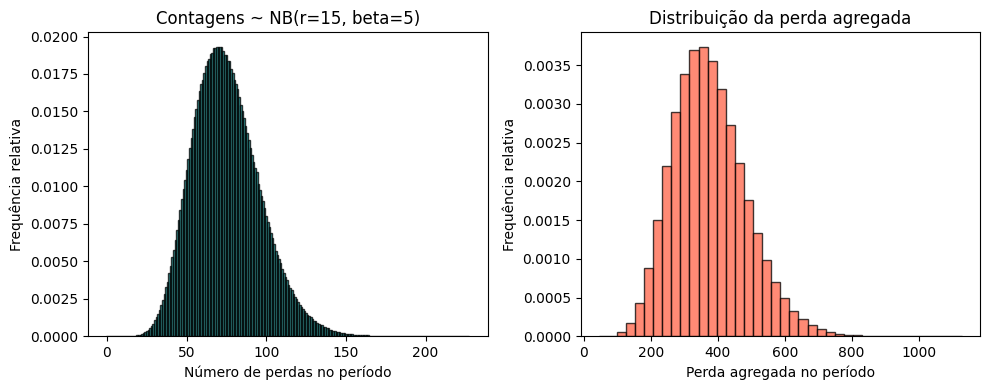

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rnbinom_counts(r: float, beta: float, size: int, rng=None) -> np.ndarray:
    """Amostra contagens ~ NB(r, beta) via mistura Gama–Poisson."""
    if r <= 0 or beta <= 0:
        raise ValueError("r e beta devem ser positivos.")
    rng = rng or np.random.default_rng()
    lam = rng.gamma(shape=r, scale=beta, size=size)
    return rng.poisson(lam)

# Parâmetros e amostragem
r, beta = 15, 5
n_periods = 2000000
rng = np.random.default_rng(123)

# Número de perdas em cada período
counts = rnbinom_counts(r, beta, n_periods, rng=rng)

# Gerar severidades individuais ~ U(0,10) e agregar por período
total_losses = np.zeros_like(counts, dtype=float)
# Método vetorizado: uma única chamada uniforme e agregação
n_total_losses = counts.sum()
if n_total_losses > 0:
    severities = rng.uniform(0.0, 10.0, size=n_total_losses)
    # índices onde cada período começa no vetor achatado
    starts = np.cumsum(counts)
    total_losses = np.add.reduceat(severities, np.insert(starts[:-1], 0, 0))

# Plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histograma das contagens
bins_counts = np.arange(counts.max() + 2) - 0.5
axes[0].hist(counts, bins=bins_counts, density=True, color="teal", edgecolor="black", alpha=0.75)
axes[0].set_xlabel("Número de perdas no período")
axes[0].set_ylabel("Frequência relativa")
axes[0].set_title(f"Contagens ~ NB(r={r}, beta={beta})")

# Histograma da severidade agregada por período
axes[1].hist(total_losses, bins=40, density=True, color="tomato", edgecolor="black", alpha=0.75)
axes[1].set_xlabel("Perda agregada no período")
axes[1].set_ylabel("Frequência relativa")
axes[1].set_title("Distribuição da perda agregada")

plt.tight_layout()
plt.show()



In [2]:
rng = np.random.default_rng(123)
n_periods = 2000000
counts = rnbinom_counts(r, beta, n_periods, rng)
n_total_losses = counts.sum()
severities = rng.uniform(0.0, 10.0, size=n_total_losses) if n_total_losses > 0 else np.array([])
starts = np.cumsum(counts)
total_losses = np.add.reduceat(severities, np.insert(starts[:-1], 0, 0)) if n_total_losses > 0 else np.zeros_like(counts, float)


In [3]:
alpha = 0.05  # probabilidade de exceder
premium = np.quantile(total_losses, 1 - alpha)  # ou np.percentile(total_losses, 95)
print(f"percentil 95%: {premium:.3f}")


percentil 95%: 568.812


# 9.8

In [9]:
import numpy as np

rng = np.random.default_rng(123)

lambdas = [5, 3, 2]
n = 100000  # tamanho da amostra de cada distribuição

samples = {lam: rng.poisson(lam, size=n) for lam in lambdas}

for lam, x in samples.items():
    print(f"λ={lam}: média≈{x.mean():.3f}, var≈{x.var():.3f}, primeiras 5: {x[:5]}")


λ=5: média≈5.008, var≈4.992, primeiras 5: [3 7 8 4 9]
λ=3: média≈2.998, var≈3.004, primeiras 5: [3 2 5 3 3]
λ=2: média≈2.000, var≈1.999, primeiras 5: [2 2 4 2 0]


In [10]:
# pesos da mistura (devem somar 1)
a, b, c = 0.25, 0.25, 0.5
weights = np.array([a, b, c])
assert np.isclose(weights.sum(), 1.0), "pesos devem somar 1"

# amostragem do componente e da Poisson correspondente
components = rng.choice(len(lambdas), size=n, p=weights)
mix_samples = rng.poisson(np.array(lambdas)[components])

print(f"média da mistura≈{mix_samples.mean():.3f}, var≈{mix_samples.var():.3f}")
print("primeiras 5 da mistura:", mix_samples[:5])


média da mistura≈2.987, var≈4.474
primeiras 5 da mistura: [3 4 3 4 7]


In [11]:
np.var(mix_samples)

np.float64(4.4735133759000005)

# 9.9

In [16]:
import numpy as np

support = np.array([0, 1, 2, 3])
p1 = np.array([0.9, 0.1, 0.0, 0.0])        # X1
p2 = np.array([0.5, 0.3, 0.2, 0.0])        # X2
p3 = np.array([0.25, 0.25, 0.25, 0.25])    # X3

# Convolução: primeiro X1+X2, depois soma com X3
p12 = np.convolve(p1, p2)  # pmf de X1+X2, suporte 0..6
pS = np.convolve(p12, p3)  # pmf de S = X1+X2+X3, suporte 0..6

support_S = np.arange(len(pS))
for s, p in zip(support_S, pS):
    print(f"S={s}: {p:.4f}")



S=0: 0.1125
S=1: 0.1925
S=2: 0.2450
S=3: 0.2500
S=4: 0.1375
S=5: 0.0575
S=6: 0.0050
S=7: 0.0000
S=8: 0.0000
S=9: 0.0000


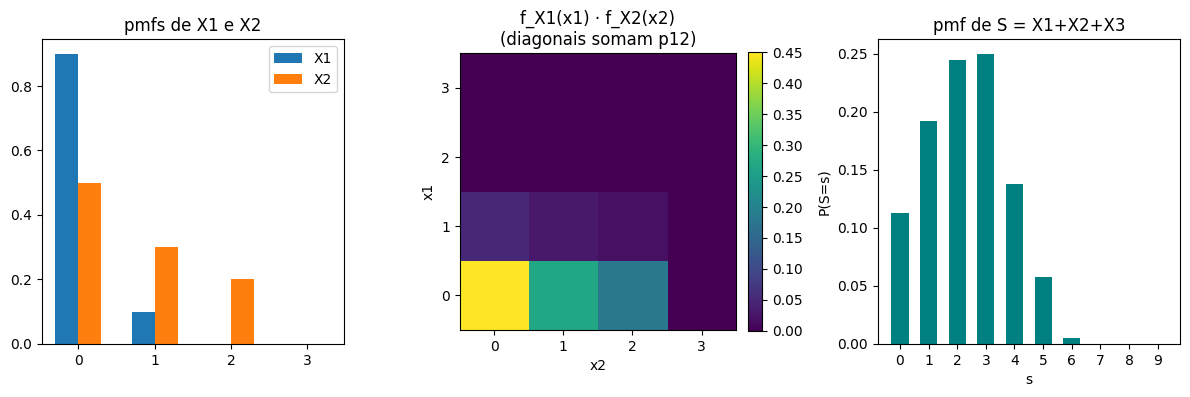

In [17]:
import numpy as np
import matplotlib.pyplot as plt

support = np.array([0, 1, 2, 3])
p1 = np.array([0.9, 0.1, 0.0, 0.0])        # X1
p2 = np.array([0.5, 0.3, 0.2, 0.0])        # X2
p3 = np.array([0.25, 0.25, 0.25, 0.25])    # X3

# Convoluções
p12 = np.convolve(p1, p2)
pS  = np.convolve(p12, p3)

# Matriz de contribuições para S = X1 + X2 (cada célula = f_X1(x) * f_X2(y))
outer12 = np.outer(p1, p2)  # linhas = x1, colunas = x2; soma em diagonais dá p12

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# pmf X1 e X2
axes[0].bar(support - 0.15, p1, width=0.3, label="X1")
axes[0].bar(support + 0.15, p2, width=0.3, label="X2")
axes[0].set_xticks(support)
axes[0].set_title("pmfs de X1 e X2")
axes[0].legend()

# heatmap das contribuições para cada soma s (diagonais)
im = axes[1].imshow(outer12, origin="lower", cmap="viridis")
axes[1].set_xticks(range(len(p2)))
axes[1].set_yticks(range(len(p1)))
axes[1].set_xlabel("x2")
axes[1].set_ylabel("x1")
axes[1].set_title("f_X1(x1) · f_X2(x2)\n(diagonais somam p12)")
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

# pmf final S = X1+X2+X3
axes[2].bar(np.arange(len(pS)), pS, width=0.6, color="teal")
axes[2].set_xticks(np.arange(len(pS)))
axes[2].set_title("pmf de S = X1+X2+X3")
axes[2].set_xlabel("s")
axes[2].set_ylabel("P(S=s)")

plt.tight_layout()
plt.show()



In [18]:
import numpy as np

p1 = np.array([0.9, 0.1, 0.0, 0.0])
p2 = np.array([0.5, 0.3, 0.2, 0.0])

outer12 = np.outer(p1, p2)   # linhas = x1, colunas = x2
p12 = np.convolve(p1, p2)

print("outer12 (linhas x1=0..3, colunas x2=0..3):")
print(np.round(outer12, 3))

# Diagonais por soma s
for s in range(len(p12)):  # s=0..6
    diag_terms = [outer12[x1, s - x1] for x1 in range(outer12.shape[0]) if 0 <= s - x1 < outer12.shape[1]]
    print(f"s={s}: termos {np.round(diag_terms, 3)} -> soma={np.round(sum(diag_terms), 3)} (convolução={p12[s]:.3f})")


outer12 (linhas x1=0..3, colunas x2=0..3):
[[0.45 0.27 0.18 0.  ]
 [0.05 0.03 0.02 0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]]
s=0: termos [0.45] -> soma=0.45 (convolução=0.450)
s=1: termos [0.27 0.05] -> soma=0.32 (convolução=0.320)
s=2: termos [0.18 0.03 0.  ] -> soma=0.21 (convolução=0.210)
s=3: termos [0.   0.02 0.   0.  ] -> soma=0.02 (convolução=0.020)
s=4: termos [0. 0. 0.] -> soma=0.0 (convolução=0.000)
s=5: termos [0. 0.] -> soma=0.0 (convolução=0.000)
s=6: termos [0.] -> soma=0.0 (convolução=0.000)


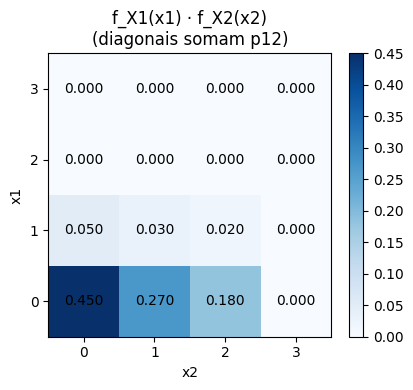

In [19]:
import numpy as np
import matplotlib.pyplot as plt

p1 = np.array([0.9, 0.1, 0.0, 0.0])  # X1
p2 = np.array([0.5, 0.3, 0.2, 0.0])  # X2

outer12 = np.outer(p1, p2)  # produtos f_X1(x1)·f_X2(x2)

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(outer12, origin="lower", cmap="Blues")

# rótulos nos centros das células
for i in range(outer12.shape[0]):       # x1 (linhas)
    for j in range(outer12.shape[1]):   # x2 (colunas)
        ax.text(j, i, f"{outer12[i, j]:.3f}",
                ha="center", va="center", color="black")

ax.set_xticks(range(len(p2)))
ax.set_yticks(range(len(p1)))
ax.set_xlabel("x2")
ax.set_ylabel("x1")
ax.set_title("f_X1(x1) · f_X2(x2)\n(diagonais somam p12)")
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


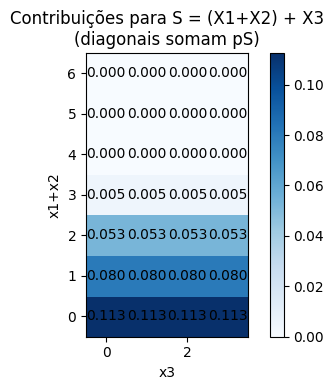

pmf de S: [0.1125 0.1925 0.245  0.25   0.1375 0.0575 0.005  0.     0.     0.    ]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

p1 = np.array([0.9, 0.1, 0.0, 0.0])
p2 = np.array([0.5, 0.3, 0.2, 0.0])
p3 = np.array([0.25, 0.25, 0.25, 0.25])

p12 = np.convolve(p1, p2)      # pmf de X1+X2
pS  = np.convolve(p12, p3)     # pmf final S = X1+X2+X3

# matriz de contribuições p12(x)·p3(y); diagonais dão pS(s)
outer = np.outer(p12, p3)

fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(outer, origin="lower", cmap="Blues")
for i in range(outer.shape[0]):      # x = valor de X1+X2
    for j in range(outer.shape[1]):  # y = valor de X3
        ax.text(j, i, f"{outer[i,j]:.3f}", ha="center", va="center", color="black")
ax.set_xlabel("x3")
ax.set_ylabel("x1+x2")
ax.set_title("Contribuições para S = (X1+X2) + X3\n(diagonais somam pS)")
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

print("pmf de S:", np.round(pS, 4))


# 9.17

In [22]:
import numpy as np

rng = np.random.default_rng(123)
n = 1_000_000
x = rng.uniform(0.0, 100.0, size=n)  # amostra fixa

def diff(k):
    A = np.where(x >= 50 * k, x / k - 50.0, 0.0)
    B = k * x
    return A.mean() - B.mean()       # queremos zero

# busca inicial em grade
k_grid = np.linspace(0.3, 1.2, 200)
diffs = np.array([diff(k) for k in k_grid])
k_hat = k_grid[np.argmin(np.abs(diffs))]
print(f"grid: k≈{k_hat:.4f}, diff≈{diff(k_hat):.4f}")

# refinamento por bisseção usando a mesma amostra
lo, hi = 0.3, 1.2
for _ in range(30):
    mid = 0.5 * (lo + hi)
    if diff(mid) > 0:  # E[A] > E[B] -> aumentar k
        lo = mid
    else:
        hi = mid
k_hat = 0.5 * (lo + hi)
print(f"bisseção: k≈{k_hat:.4f}, diff≈{diff(k_hat):.6f}")



grid: k≈0.6663, diff≈0.0325
bisseção: k≈0.6665, diff≈-0.000000


k final≈0.666522, g(k)=E[A]-E[B]≈0.000002


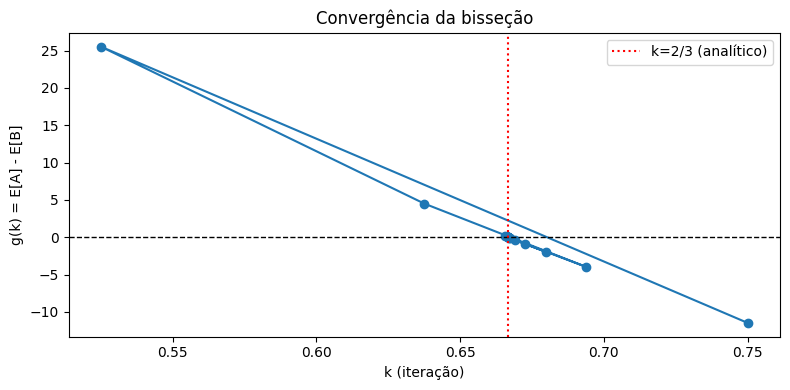

In [23]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(123)
n = 500_000
x = rng.uniform(0.0, 100.0, size=n)

def g(k):
    A = np.where(x >= 50 * k, x / k - 50.0, 0.0)
    B = k * x
    return A.mean() - B.mean()

lo, hi = 0.3, 1.2
ks, gs = [], []

for _ in range(25):  # iterações
    mid = 0.5 * (lo + hi)
    val = g(mid)
    ks.append(mid)
    gs.append(val)
    if val > 0:
        lo = mid
    else:
        hi = mid

print(f"k final≈{ks[-1]:.6f}, g(k)=E[A]-E[B]≈{gs[-1]:.6f}")

plt.figure(figsize=(8, 4))
plt.plot(ks, gs, marker="o")
plt.axhline(0, color="k", linestyle="--", linewidth=1)
plt.axvline(2/3, color="red", linestyle=":", label="k=2/3 (analítico)")
plt.xlabel("k (iteração)")
plt.ylabel("g(k) = E[A] - E[B]")
plt.title("Convergência da bisseção")
plt.legend()
plt.tight_layout()
plt.show()


# 9.22

In [45]:
import numpy as np

def sample_Y(size, rng=None):
    """
    Amostra Y com pdf f(y)=0.02*(1 - y/100) para y em (0,100).
    Inversa: F(y)=0.02*y - 0.0001*y^2; u~U(0,1) -> y=100*(1 - sqrt(1-u)).
    """
    rng = rng or np.random.default_rng()
    u = rng.random(size)
    return 100.0 * (1.0 - np.sqrt(1.0 - u))


In [46]:
y = sample_Y(1000000, rng)

In [47]:
excess_loss_variable = [0.8*(e - 10) if e > 10 else 0 for e in y]

In [48]:
np.mean(excess_loss_variable)

np.float64(19.45141393848194)

# 9.23

In [62]:
import numpy as np

rng = np.random.default_rng(123)

support = np.array([0, 1, 2, 3])
pmf = np.array([0.5, 0.2, 0.2, 0.1])  # X

n_obs = 1000000  # número de observações de X
xs = rng.choice(support, size=n_obs, p=pmf)

# Para cada X_i, gera X_i normais com média 100 e desvio 3 (variância 9)
normals_per_obs = np.array([rng.normal(loc=100.0, scale=3.0, size=k).sum() for k in xs])

# Opcional: todas as normais em um único vetor
#all_normals = np.concatenate(normals_per_obs) if normals_per_obs else np.array([])


In [63]:
if all_normals.size == 0:
    prob = 0.0
else:
    prob = (normals_per_obs > 100).mean()  # equivalente a sum(...) / size
print(f"P(N > 100) estimada: {prob:.4f}")


P(N > 100) estimada: 0.4002


# 9.32

In [64]:
import numpy as np

rng = np.random.default_rng(123)
m, q = 12, 0.25
n_samples = 10_000

binom_samples = rng.binomial(n=m, p=q, size=n_samples)
print("primeiros 10:", binom_samples[:10])
print(f"média≈{binom_samples.mean():.3f}, var≈{binom_samples.var():.3f} (teórica: {m*q:.3f}, {m*q*(1-q):.3f})")


primeiros 10: [4 1 2 2 2 4 5 2 4 5]
média≈2.972, var≈2.205 (teórica: 3.000, 2.250)


In [66]:
excess_loss_variable = [0.8*(e - 5) if e > 5 else 0 for e in binom_samples]

In [67]:
np.mean(excess_loss_variable)

np.float64(0.05536)

Tail mass acima de x_max=3276.7: 0.000e+00


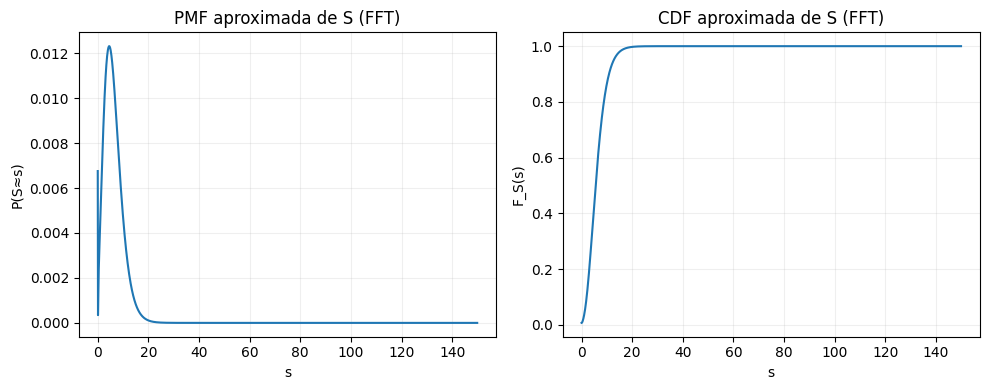

P(S <= 10.0) ≈ 0.865722


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# -----------------------------
# Compound Poisson via FFT
# S = sum_{i=1}^N X_i,  N ~ Poisson(lam)
# X ~ Lognormal(mu, sigma) (discretizado em bins de largura h)
# -----------------------------

# 1) parâmetros
lam = 5.0                 # intensidade do Poisson
mu, sigma = 0.0, 0.7      # lognormal: ln X ~ N(mu, sigma^2)

h = 0.1                   # passo do grid (quanto menor, mais preciso e mais caro)
M = 2**15                 # número de pontos (potência de 2 => FFT rápida)
x_max = h*(M-1)

# 2) discretização da severidade: pX[k] = P(kh <= X < (k+1)h)
#    (usa CDF para evitar integrar pdf)
edges = np.arange(0, x_max + h, h)              # tamanho M+1
Fx = stats.lognorm(s=sigma, scale=np.exp(mu)).cdf(edges)
pX = np.diff(Fx)                                 # tamanho M

# massa que "vaza" acima de x_max (aliasing potencial)
tail_mass = 1.0 - Fx[-1]
print(f"Tail mass acima de x_max={x_max:.1f}: {tail_mass:.3e}")

# (opcional) colocar o vazamento no último bin (simplificação)
# pX[-1] += tail_mass

# 3) FFT da pmf da severidade (cuidado: pmf em grid; soma(pX)=~1)
PX = np.fft.fft(pX)

# 4) Compound Poisson no domínio da frequência
PS = np.exp(lam * (PX - 1.0))

# 5) Volta: pmf do agregado
pS = np.fft.ifft(PS).real
pS[pS < 0] = 0.0
pS = pS / pS.sum()  # renormaliza (numérico)

# 6) CDF do agregado no grid
FS = np.cumsum(pS)
xs = np.arange(M) * h

# 7) Plots rápidos
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(xs[:1500], pS[:1500])
plt.title("PMF aproximada de S (FFT)")
plt.xlabel("s"); plt.ylabel("P(S≈s)")
plt.grid(alpha=0.2)

plt.subplot(1,2,2)
plt.plot(xs[:1500], FS[:1500])
plt.title("CDF aproximada de S (FFT)")
plt.xlabel("s"); plt.ylabel("F_S(s)")
plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()

# exemplo de consulta: P(S <= t)
t = 10.0
k = int(np.floor(t/h))
print(f"P(S <= {t}) ≈ {FS[k]:.6f}")
